In [1]:
import sys
import pandas as pd

In [27]:
raw_counts = pd.read_csv("/home/skillachie/Downloads/raw_topic_counts.csv",index_col=0,parse_dates=True)
binary_counts = pd.read_csv("/home/skillachie/Downloads/binary.csv",index_col=0,parse_dates=True)

In [19]:
print raw_counts.head()

                     nat_disa_location_US  politics_location_US  \
2009-01-01 00:00:00                     0                   240   
2009-01-01 01:00:00                     0                   173   
2009-01-01 02:00:00                     0                   116   
2009-01-01 03:00:00                     0                    58   
2009-01-01 04:00:00                     0                    98   

                     fin_location_US  sci_tech_location_US  other_location_US  \
2009-01-01 00:00:00               18                    47                154   
2009-01-01 01:00:00               32                    32                 66   
2009-01-01 02:00:00               99                    40                 29   
2009-01-01 03:00:00                5                    10                 13   
2009-01-01 04:00:00               14                    39                 20   

                     fin_location_WORLD  sports_location_WORLD  \
2009-01-01 00:00:00                   0     

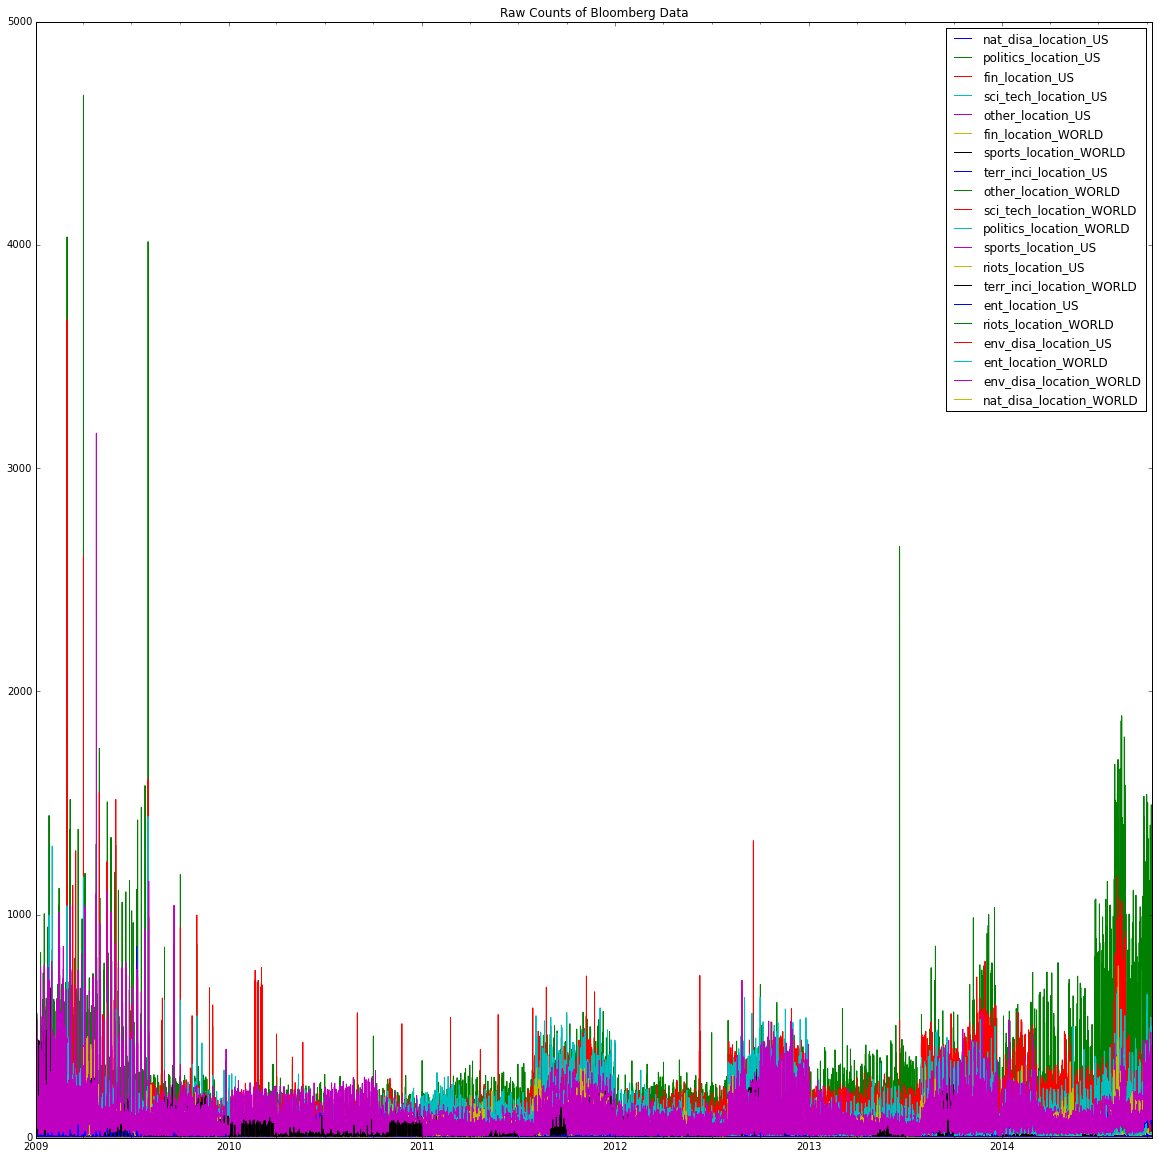

In [20]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 20, 20

#f = plt.figure(figsize=(10, 10)) # Change the size as necessar
raw_counts.plot(title="Raw Counts of Bloomberg Data")

## Use only single day

In [32]:
sub_raw = raw_counts.loc['20100105':'20100105']
sub_binary = binary_counts.loc['20100105':'20100105']
#print sub_binary.head()

##Looking at Finance US 

/home/skillachie/Development/lang/pyenv/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/home/skillachie/Development/lang/pyenv/lib/python2.7/site-packages/IPython/kernel/__main__.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


78.0
2010-01-05 00:00:00    78
2010-01-05 01:00:00    78
2010-01-05 02:00:00    78
2010-01-05 03:00:00    78
2010-01-05 04:00:00    78
2010-01-05 05:00:00    78
2010-01-05 06:00:00    78
2010-01-05 07:00:00    78
2010-01-05 08:00:00    78
2010-01-05 09:00:00    78
2010-01-05 10:00:00    78
2010-01-05 11:00:00    78
2010-01-05 12:00:00    78
2010-01-05 13:00:00    78
2010-01-05 14:00:00    78
2010-01-05 15:00:00    78
2010-01-05 16:00:00    78
2010-01-05 17:00:00    78
2010-01-05 18:00:00    78
2010-01-05 19:00:00    78
2010-01-05 20:00:00    78
2010-01-05 21:00:00    78
2010-01-05 22:00:00    78
2010-01-05 23:00:00    78
Name: fin_location_US_med, dtype: float64
2010-01-05 00:00:00     0
2010-01-05 01:00:00     0
2010-01-05 02:00:00    78
2010-01-05 03:00:00    78
2010-01-05 04:00:00    78
dtype: float64
2010-01-05 00:00:00    0
2010-01-05 01:00:00    0
2010-01-05 02:00:00    1
2010-01-05 03:00:00    1
2010-01-05 04:00:00    1
dtype: float64
                     fin_location_US  fin_lo

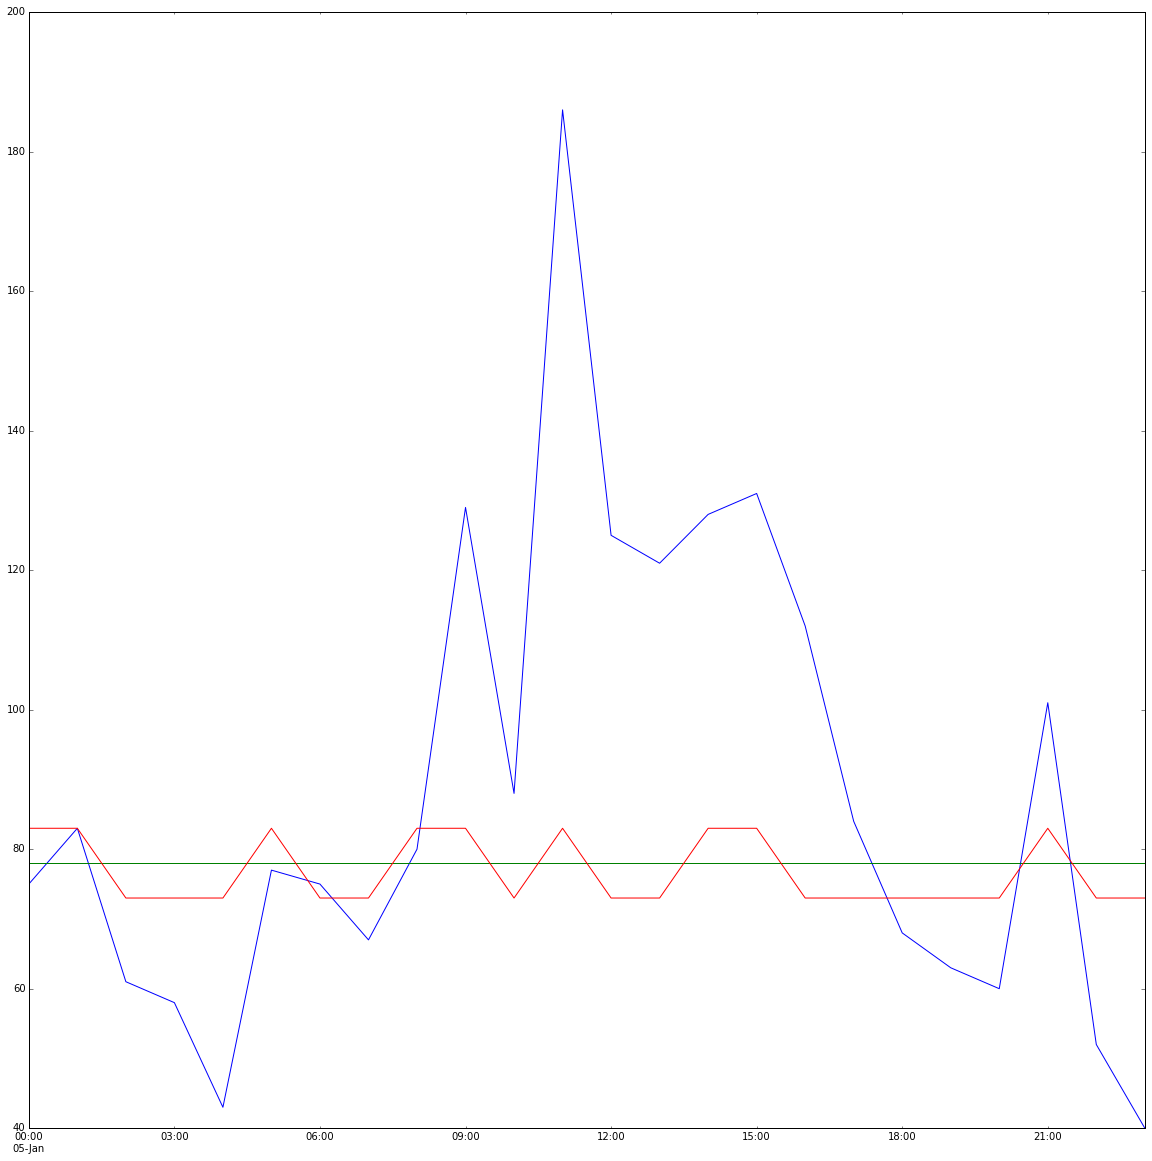

In [76]:
finance_us = sub_raw[['fin_location_US']]
finance_us["fin_location_US_med"] = raw_counts['fin_location_US'].median() # Median from entire finance dataset
fin_sub_med = finance_us.median()
print raw_counts['fin_location_US'].median()
print finance_us["fin_location_US_med"]
#plt.gca().axhline(fin_med['fin_location_US'], color=np.random.rand(3,1), linestyle='--',label='Finance Median')

fin_plot = finance_us["fin_location_US"].plot()

fin_plot = finance_us["fin_location_US_med"].plot()
#Debug
#fin_plot.axhline(fin_sub_med['fin_location_US'], color=np.random.rand(3,1), linestyle='--',label='Period Finance Median')
#fin_plot.legend()




ddf = sub_binary[['fin_location_US_quartile_1',
           'fin_location_US_quartile_2',
           'fin_location_US_quartile_3',
           'fin_location_US_quartile_4',
            'fin_location_US_quartile_5']]

udf = sub_binary[['fin_location_US_quartile_6',
           'fin_location_US_quartile_7',
           'fin_location_US_quartile_8',
           'fin_location_US_quartile_9',
            'fin_location_US_quartile_10']]


lower_q =  ddf.sum(axis=1)
upper_q =  udf.sum(axis=1)

ddf["fin_location_US_bin"] = (fin_med['fin_location_US'] - 5)*lower_q + (fin_med['fin_location_US'] + 5)* upper_q

print new_lower_q.head()
print lower_q.head()
print finance_us.head()


ddf["fin_location_US_bin"].plot()
#new_lower_q.plot()


# Deciles plot
#fin_bin = sub_binary[['fin_location_US_quartile_1','fin_location_US_quartile_2',
                     # 'fin_location_US_quartile_3','fin_location_US_quartile_4',
                     # 'fin_location_US_quartile_5','fin_location_US_quartile_6',
                     # 'fin_location_US_quartile_7','fin_location_US_quartile_8',
                     # 'fin_location_US_quartile_9','fin_location_US_quartile_10']]
#fin_bin.plot(kind='bar')



/home/skillachie/Development/lang/pyenv/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


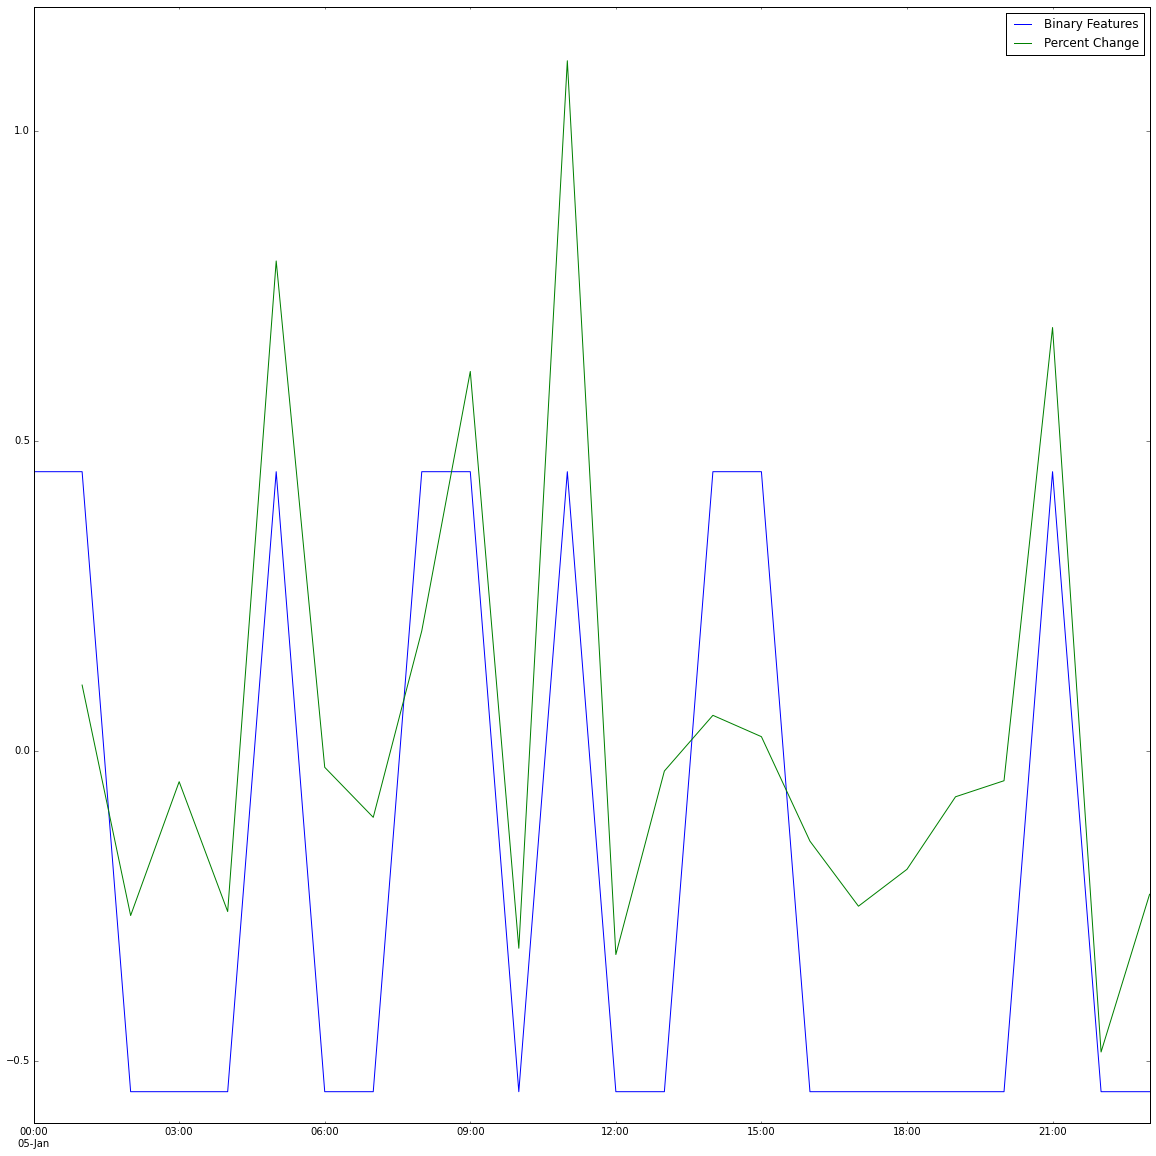

In [89]:
plt.clf()
pct_change =  finance_us["fin_location_US"].pct_change()
ddf["fin_location_US_bin"] = (pct_change.median() - 0.5)*lower_q + (pct_change.median() + 0.5)* upper_q
ddf["fin_location_US_bin"].plot(label='Binary Features')
pct_change.plot(label='Percent Change')
plt.legend()

## Looking at Politics in US

politics_location_US    92
dtype: float64


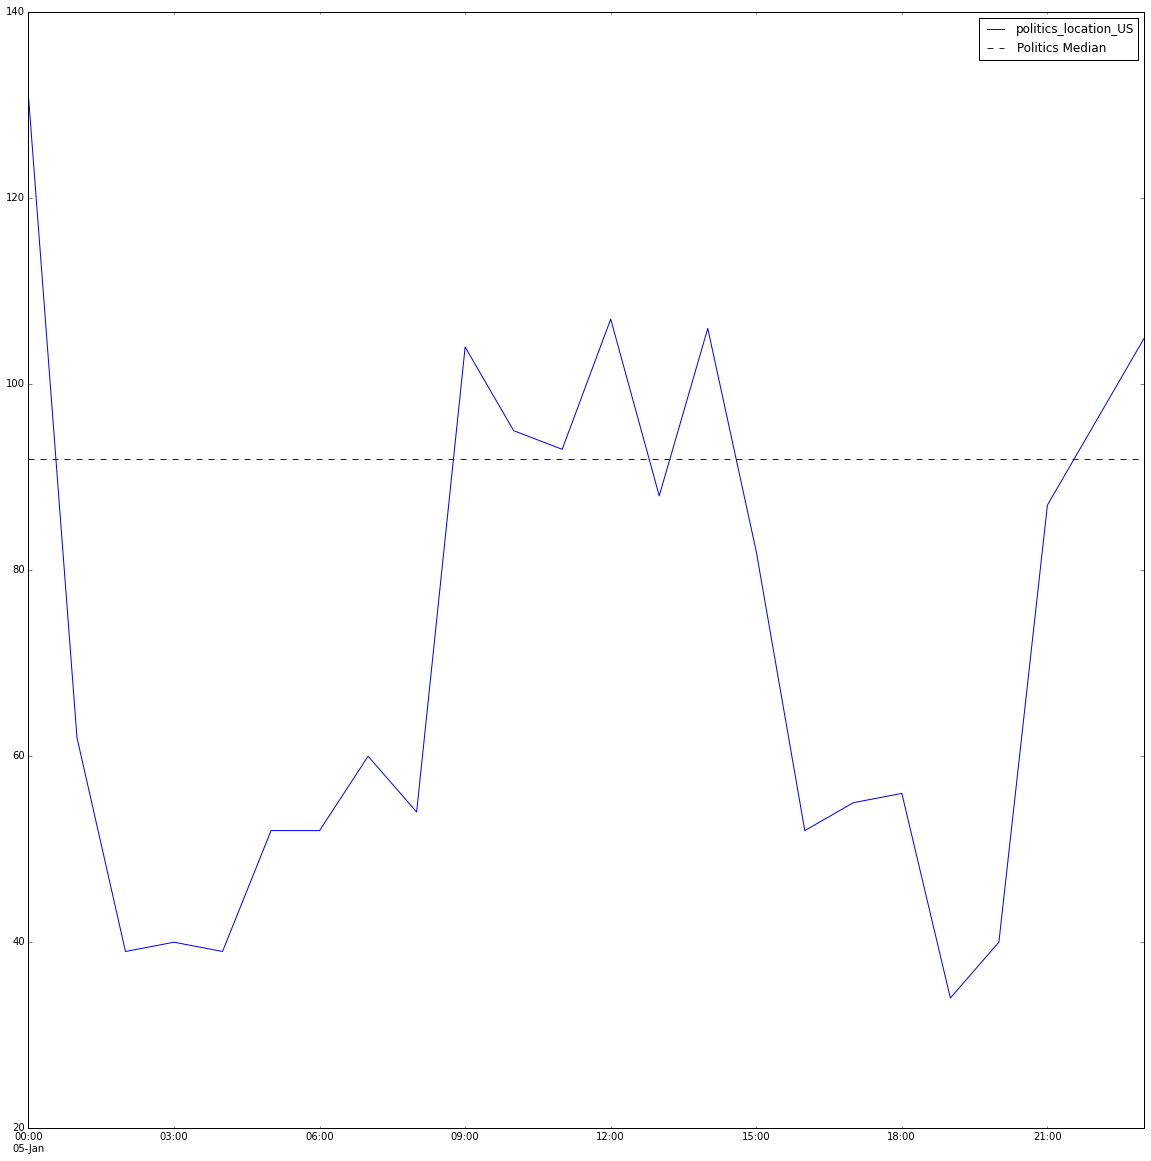

In [23]:
politics_us = sub_raw[['politics_location_US']]
politics_med = raw_counts[['politics_location_US']].median() # Median from entire finance dataset
print politics_med

pol_plot = politics_us.plot()
pol_plot.axhline(politics_med['politics_location_US'], color=np.random.rand(3,1), linestyle='--',label='Politics Median')
pol_plot.legend()

## Looking at Natural Disaster

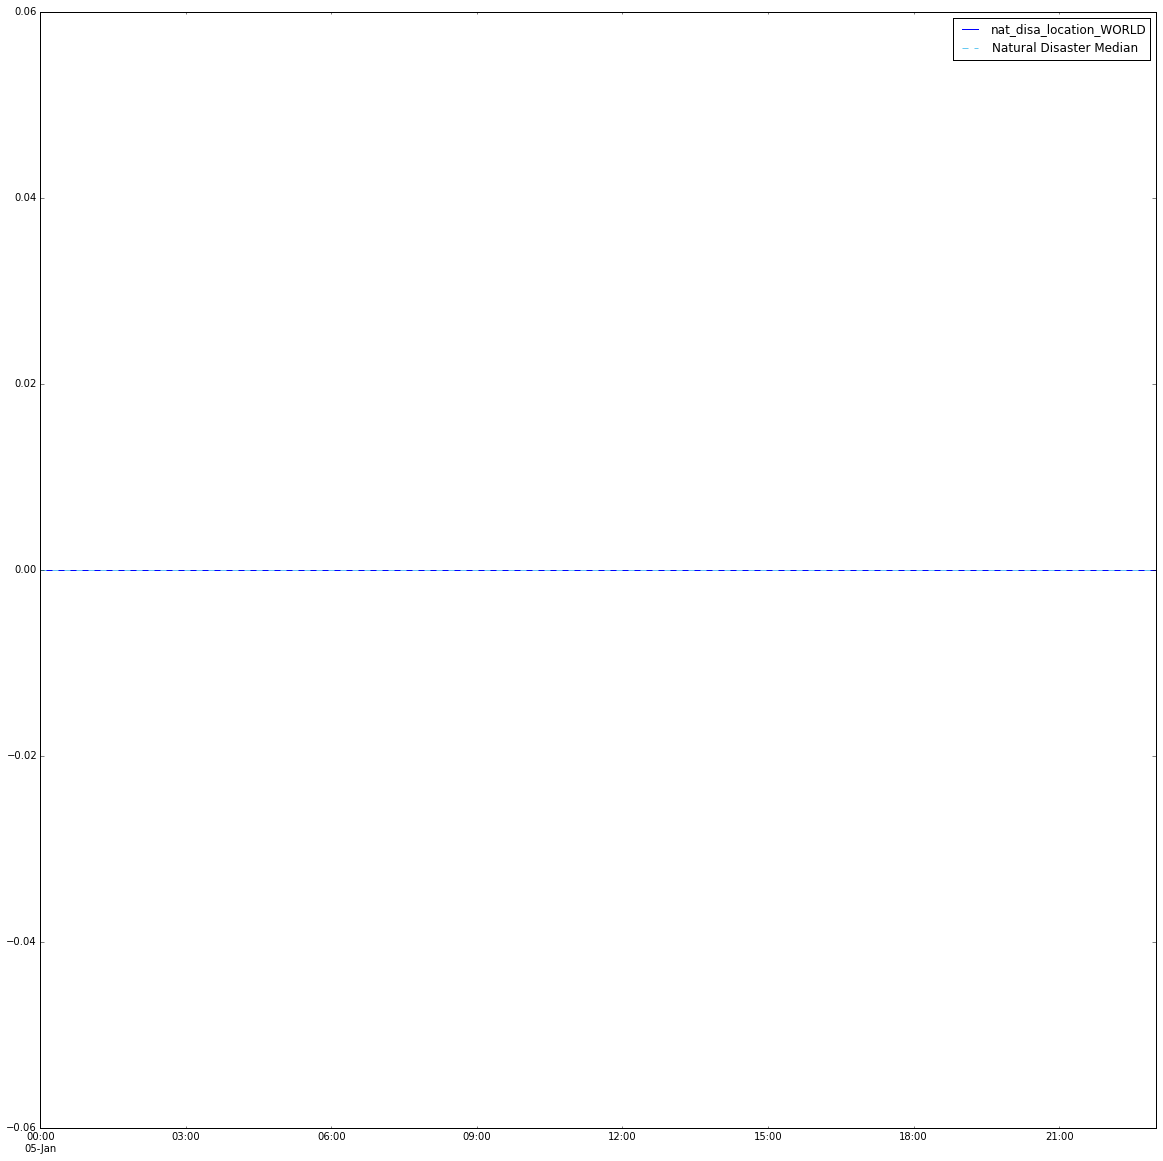

In [24]:
nat_us = sub_raw[['nat_disa_location_WORLD']]
nat_med = raw_counts[['nat_disa_location_WORLD']].median() # Median from entire finance dataset

nat_plot = nat_us.plot()
nat_plot.axhline(nat_med['nat_disa_location_WORLD'], color=np.random.rand(3,1), linestyle='--',label='Natural Disaster Median')
nat_plot.legend()

#0 signal seems fine since no significant natural disasters happened in the US or WORLD 
# https://en.wikipedia.org/wiki/Portal:Current_events/2011_January_5

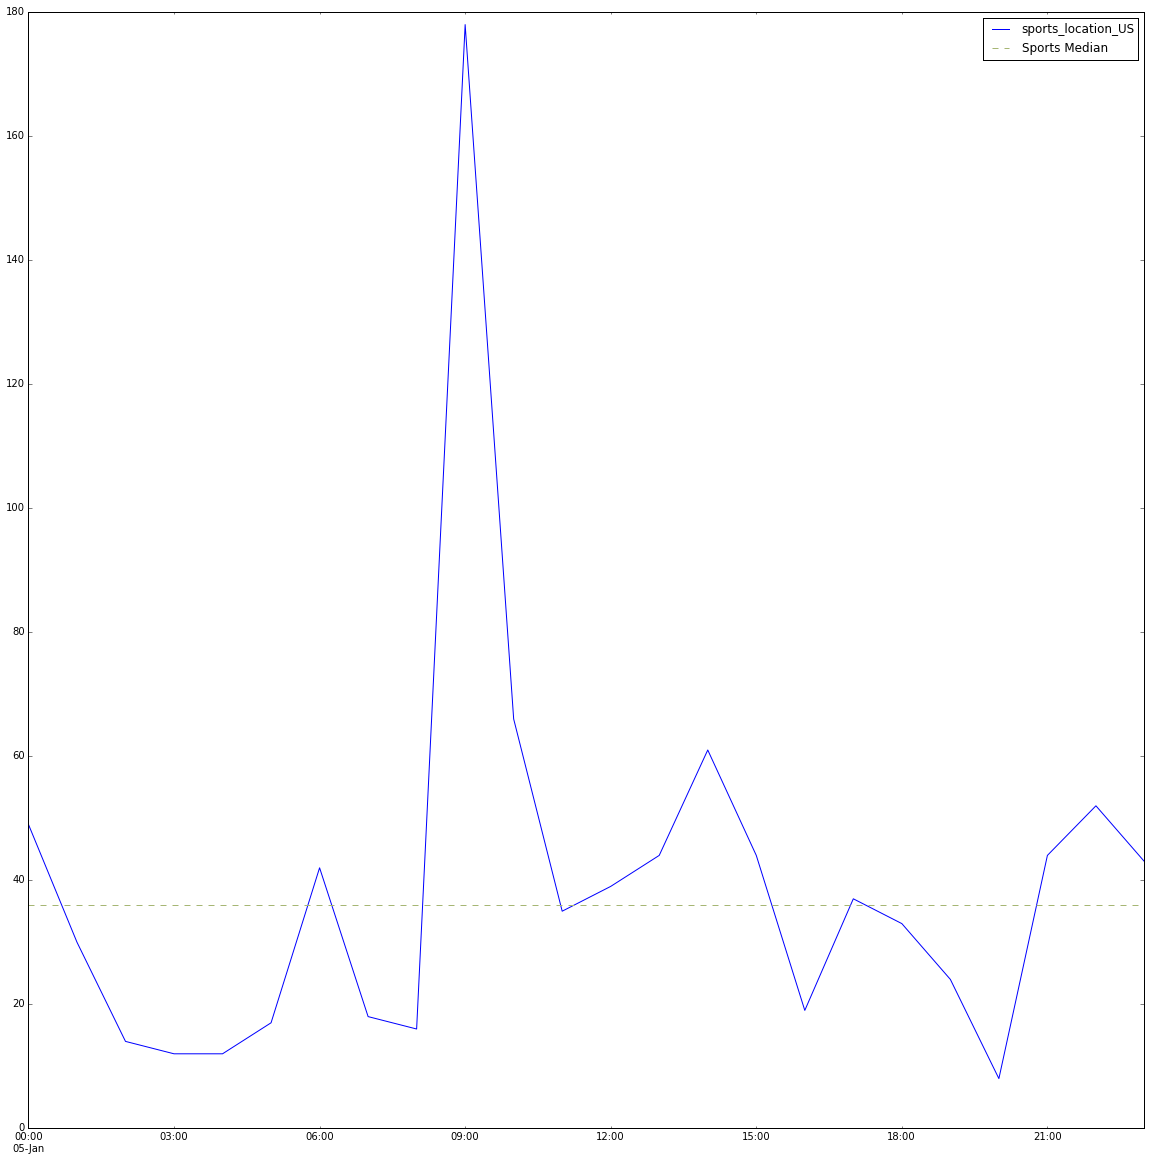

In [25]:
sports_us = sub_raw[['sports_location_US']]
sports_med = raw_counts[['sports_location_US']].median() # Median from entire finance dataset

sports_plot = sports_us.plot()
sports_plot.axhline(sports_med['sports_location_US'], color=np.random.rand(3,1), linestyle='--',label='Sports Median')
sports_plot.legend()

# Signal seems to also be correct based on the events in sports and art & culture 
# https://en.wikipedia.org/wiki/Portal:Current_events/2011_January_5